In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import scipy.stats
from datetime import datetime

## London 

In [17]:
london_2018 = pd.read_csv('C:\\Users\\User\\Downloads\\citizen_science_inaturalist-main\\data\\raw\\network_citizen_science_data\\CNC_London_2018.csv')
london_2019 = pd.read_csv('C:\\Users\\User\\Downloads\\citizen_science_inaturalist-main\\data\\raw\\network_citizen_science_data\\CNC_London_2019.csv')
london_2020 = pd.read_csv('C:\\Users\\User\\Downloads\\citizen_science_inaturalist-main\\data\\raw\\network_citizen_science_data\\CNC_London_2020.csv')

In [19]:
london_2018.head()

,captive,created_at,created_time_zone,description,faves_count,geoprivacy,iconic_taxon_name,id,identifications,identifications_most_agree,...,taxon_native,taxon_observations,taxon_parent_id,taxon_rank,taxon_search_rank,taxon_threatened,time_observed_at,updated_at,user_id,user_login
0,False,2018-04-27T07:06:17+00:00,Etc/UTC,NaN,0,NaN,Plantae,11479007,"[{'user_id': 353381, 'category': 'improving', ...",True,...,True,26927.0,204212.0,species,26927.0,False,2018-04-27T07:52:34+00:00,2018-04-27T09:26:56+00:00,159021,muki
1,False,2018-04-27T09:02:52+01:00,Europe/London,NaN,0,NaN,Aves,11480212,"[{'user_id': 29729, 'category': 'supporting', ...",True,...,False,39992.0,3017.0,variety,39992.0,False,2018-04-27T08:39:41+01:00,2019-01-29T21:16:34+00:00,664459,lucyrobinsonnhm
2,True,2018-04-27T10:42:01+02:00,Europe/Amsterdam,NaN,0,NaN,Plantae,11480902,"[{'user_id': 908315, 'category': 'leading', 'd...",False,...,False,2803.0,56095.0,species,2803.0,False,2018-04-27T08:34:31+02:00,2018-04-27T13:01:49+02:00,908315,tess26
3,False,2018-04-27T10:54:45+02:00,Europe/Amsterdam,NaN,0,NaN,Plantae,11481097,"[{'user_id': 160, 'category': 'improving', 'di...",True,...,False,4551.0,156638.0,species,4551.0,False,2018-04-27T09:54:35+02:00,2018-04-27T22:23:41+02:00,796473,bryonycross
4,False,2018-04-27T11:09:55+01:00,Europe/London,NaN,0,NaN,Plantae,11482247,"[{'user_id': 160, 'category': 'supporting', 'd...",True,...,False,5637.0,49664.0,hybrid,5637.0,False,2018-04-27T08:42:21+01:00,2018-04-27T16:37:31+01:00,664459,lucyrobinsonnhm


## San Fransisco 

In [3]:
sf_2018 = pd.read_csv('C:\\Users\\User\\Downloads\\citizen_science_inaturalist-main\\data\\raw\\network_citizen_science_data\\CNC_San_Francisco_2018.csv')
sf_2019 = pd.read_csv('C:\\Users\\User\\Downloads\\citizen_science_inaturalist-main\\data\\raw\\network_citizen_science_data\\CNC_San_Francisco_2019.csv')
sf_2020 = pd.read_csv('C:\\Users\\User\\Downloads\\citizen_science_inaturalist-main\\data\\raw\\network_citizen_science_data\\CNC_San_Francisco_2020.csv')



In [4]:
sf_2020.head()

,captive,created_at,created_time_zone,description,faves_count,geoprivacy,iconic_taxon_name,id,identifications,identifications_most_agree,...,taxon_native,taxon_observations,taxon_parent_id,taxon_rank,taxon_search_rank,taxon_threatened,time_observed_at,updated_at,user_id,user_login
0,False,2020-04-24T00:01:46-07:00,America/Los_Angeles,NaN,0,NaN,Insecta,43036609,"[{'user_id': 2692, 'category': 'improving', 'd...",True,...,False,915.0,119861.0,species,915.0,False,2020-04-24T00:00:58-07:00,2020-08-24T00:02:19-07:00,2692,kestrel
1,False,2020-04-24T00:07:05-07:00,America/Los_Angeles,NaN,0,NaN,Arachnida,43036980,"[{'user_id': 179103, 'category': 'maverick', '...",True,...,False,1454.0,83722.0,genus,1454.0,False,2020-04-24T00:01:00-07:00,2020-04-29T22:32:41-07:00,179103,catchang
2,False,2020-04-24T00:07:06-07:00,America/Los_Angeles,NaN,0,NaN,Insecta,43036981,"[{'user_id': 179103, 'category': 'improving', ...",True,...,False,994.0,205759.0,species,994.0,False,2020-04-24T00:01:00-07:00,2020-08-24T00:02:20-07:00,179103,catchang
3,False,2020-04-24T00:07:06-07:00,America/Los_Angeles,NaN,0,NaN,Arachnida,43036982,"[{'user_id': 179103, 'category': 'improving', ...",True,...,False,5219.0,61998.0,species,5219.0,False,2020-04-24T00:01:00-07:00,2020-04-29T22:21:53-07:00,179103,catchang
4,False,2020-04-24T00:10:24-07:00,America/Los_Angeles,NaN,0,NaN,Animalia,43037180,"[{'user_id': 819, 'category': 'leading', 'disa...",False,...,False,25005.0,48295.0,species,25005.0,False,2020-04-24T00:02:24-07:00,2020-04-24T00:11:25-07:00,819,rebeccafay


In [5]:
la_2018 = pd.read_csv('C:\\Users\\User\\Downloads\\citizen_science_inaturalist-main\\data\\raw\\network_citizen_science_data\\CNC_Los_Angeles_2018.csv')
la_2019 = pd.read_csv('C:\\Users\\User\\Downloads\\citizen_science_inaturalist-main\\data\\raw\\network_citizen_science_data\\CNC_Los_Angeles_2019.csv')
la_2020 = pd.read_csv('C:\\Users\\User\\Downloads\\citizen_science_inaturalist-main\\data\\raw\\network_citizen_science_data\\CNC_Los_Angeles_2020.csv')

In [41]:
def bipartite_net_make(df, min_weight = 2):
    """
    The function returns a biaprtite network with the two types of nodes: observations and 
    actions (changes made by other users of INaturalist)
    
    Arguments:
    - df -- dataframe
    - min_weight - minimal weight of an edge between nodes
    """
    
    df_net = pd.DataFrame()
    
    for _, row in df.iterrows():
        idents = row['identifications']
        if pd.isnull(idents) == False:
            df_temp = pd.DataFrame(eval(idents))
            df_temp['target'] = np.repeat(row['user_id'], df_temp.shape[0])
            df_net = df_net.append(df_temp)
        
    edges = pd.DataFrame(df_net[['user_id', 'target']])
    edges
    return edges

    # removing loops
    edges['temp'] = np.array(edges['user_id']) == np.array(edges['target'])
    edges = edges[edges['temp'] == False]
    edges = edges.drop(['temp'], axis = 1)
    
    # removing edges based on the chosen threshold
    edges['weight'] = 1
    edges = edges.groupby(by=['user_id', 'target']).sum().reset_index()
    edges = edges[edges['weight'] >= min_weight]
    
    bipartite_G = nx.Graph()

    for r, d in edges.iterrows():
        pid = 'P{0}'.format(d['user_id']) 
        cid = 'C{0}'.format(d['target'])  
        bipartite_G.add_node(pid, bipartite='action')
        bipartite_G.add_node(cid, bipartite='observation')
        bipartite_G.add_edge(pid, cid)
        
    return bipartite_G

In [7]:
def projection_make(bip_net, projection = 'action'):
    """
    The function returns a projection of a bipartite network 
    
    Arguments:
    
    - bip_net -- bipartite networks
    - projection (observation or action) -- in the case of 'action', the function returns a network where users are
    connected based on the common observations (they were working on); 'observation'  returns a network of 
    observations having a common list of collaborators
    """
    
    if projection == 'action':
        action_nodes = [node for node in bip_net.nodes() if bip_net.nodes[node]['bipartite'] == 'action']
        actions_graph = nx.bipartite.projection.projected_graph(bip_net, action_nodes)
        
        return actions_graph
    
    elif projection == 'observation':
        observation_nodes = [node for node in bip_net.nodes() if bip_net.nodes[node]['bipartite'] == 'observation']
        observations_graph = nx.bipartite.projection.projected_graph(bip_net, observation_nodes)
        
        return observations_graph

In [8]:
def descriptive_net_analysis(net):
    
    """
    The function returns basic descriptive characteristics of a net
    """
    
    nodes = net.number_of_nodes()
    edges = net.number_of_edges()
    density = nx.density(net)
    
    beetweenness = nx.betweenness_centrality(net)
    avg_beetw = np.mean(list(beetweenness.values()))
    sd_beetw = np.std(list(beetweenness.values()))
    
    degree = nx.degree_centrality(net)
    avg_degree = np.mean(list(degree.values()))
    sd_degree = np.std(list(degree.values()))
    
    clustering_coef = nx.average_clustering(net)
    
    print("number of nodes: {}, number of edges: {}".format(nodes, edges))
    print("density of the network: {0:.2f}".format(density))
    print("average beetweenness of the network: {}, sd: {}".format(avg_beetw, sd_beetw))
    print("average degree of the network: {}, sd: {}".format(avg_degree, sd_degree))
    print("clustering coefficient:", clustering_coef)

## Construction of networks
###  Creating networks for each year 2018-2020 for three cities 

#### London

In [10]:
#bipartite
g_london_2018 = bipartite_net_make(london_2018, min_weight = 2)
g_london_2019 = bipartite_net_make(london_2019, min_weight = 2)
g_london_2020 = bipartite_net_make(london_2020, min_weight = 2)

#projection
london_proj2018 = projection_make(g_london_2018, projection = 'action')
london_proj2019 = projection_make(g_london_2019, projection = 'action')
london_proj2020 = projection_make(g_london_2020, projection = 'action')

In [39]:
g_london_2018

In [40]:
london_proj2018

### San Fransisco

In [11]:
#bipartite
g_sf_2018 = bipartite_net_make(sf_2018, min_weight = 2)
g_sf_2019 = bipartite_net_make(sf_2019, min_weight = 2)
g_sf_2020 = bipartite_net_make(sf_2020, min_weight = 2)

#projection
sf_proj2018 = projection_make(g_sf_2018, projection = 'action')
sf_proj2019 = projection_make(g_sf_2019, projection = 'action')
sf_proj2020 = projection_make(g_sf_2020, projection = 'action')

### Los Angeles 

In [12]:
#bipartite
g_la_2018 = bipartite_net_make(la_2018, min_weight = 2)
g_la_2019 = bipartite_net_make(la_2019, min_weight = 2)
g_la_2020 = bipartite_net_make(la_2020, min_weight = 2)

#projection
la_proj2018 = projection_make(g_la_2018, projection = 'action')
la_proj2019 = projection_make(g_la_2019, projection = 'action')
la_proj2020 = projection_make(g_la_2020, projection = 'action')

## Analysis of networks

### London

In [13]:

print("network for year 2018 London")
print('-----------------------------')
descriptive_net_analysis(london_proj2018)

print('-----------------------------')
print("network for year 2019 London")
descriptive_net_analysis(london_proj2019)

print('-----------------------------')
print("network for year 2020 London")
descriptive_net_analysis(london_proj2020)


network for year 2018 London
-----------------------------
number of nodes: 141, number of edges: 3655
density of the network: 0.37
average beetweenness of the network: 0.004444833191197802, sd: 0.013419421433787467
average degree of the network: 0.3703140830800405, sd: 0.25496415149346374
clustering coefficient: 0.8840563697112608
-----------------------------
network for year 2019 London
number of nodes: 206, number of edges: 7308
density of the network: 0.35
average beetweenness of the network: 0.003176117712062328, sd: 0.010756374208345184
average degree of the network: 0.3461046649301445, sd: 0.2584748125781289
clustering coefficient: 0.9051918436132372
-----------------------------
network for year 2020 London
number of nodes: 154, number of edges: 2668
density of the network: 0.23
average beetweenness of the network: 0.004919272334133014, sd: 0.015720032635685676
average degree of the network: 0.22646634411340297, sd: 0.2001300725874848
clustering coefficient: 0.7931981229017593

### San Fransisco

In [21]:
print('-----------------------------')
print("network for year 2018 San Fransisco")
descriptive_net_analysis(sf_proj2018)

print('-----------------------------')
print("network for year 2019 San Fransisco")
descriptive_net_analysis(sf_proj2019)

print('-----------------------------')
print("network for year 2020 San Fransisco")
descriptive_net_analysis(sf_proj2020)


-----------------------------
network for year 2018 San Fransisco
number of nodes: 636, number of edges: 30628
density of the network: 0.15
average beetweenness of the network: 0.0012813807327116677, sd: 0.005669887894828528
average degree of the network: 0.15167632347843313, sd: 0.16219834298623734
clustering coefficient: 0.8055607901180315
-----------------------------
network for year 2019 San Fransisco
number of nodes: 666, number of edges: 26153
density of the network: 0.12
average beetweenness of the network: 0.0013451489355103825, sd: 0.006584434393223757
average degree of the network: 0.11810156020682337, sd: 0.13695390689567652
clustering coefficient: 0.8030974330380027
-----------------------------
network for year 2020 San Fransisco
number of nodes: 611, number of edges: 16977
density of the network: 0.09
average beetweenness of the network: 0.0014484599308336738, sd: 0.007201481349345319
average degree of the network: 0.09110031928308873, sd: 0.11216016100594393
clustering 

### Los Angeles

In [20]:
print('-----------------------------')
print("network for year 2018 Los Angeles")
descriptive_net_analysis(la_proj2018)

print('-----------------------------')
print("network for year 2019 Los Angeles")
descriptive_net_analysis(la_proj2019)


print('-----------------------------')
print("network for year 2020 Los Angeles")
descriptive_net_analysis(la_proj2020)


-----------------------------
network for year 2018 Los Angeles
number of nodes: 505, number of edges: 25292
density of the network: 0.20
average beetweenness of the network: 0.0015975184567590534, sd: 0.005721592601254014
average degree of the network: 0.19874273141599874, sd: 0.18371191800500875
clustering coefficient: 0.8171914193052956
-----------------------------
network for year 2019 Los Angeles
number of nodes: 612, number of edges: 35059
density of the network: 0.19
average beetweenness of the network: 0.0013377026733886754, sd: 0.004284953119000909
average degree of the network: 0.18751537712739214, sd: 0.1801642093316199
clustering coefficient: 0.808378623504858
-----------------------------
network for year 2020 Los Angeles
number of nodes: 423, number of edges: 14542
density of the network: 0.16
average beetweenness of the network: 0.001936181150740378, sd: 0.008205155852890557
average degree of the network: 0.16293009758775615, sd: 0.16329486128158532
clustering coefficie

({'xlim': [0, 677],
  'ylim': [0, 677],
  'linkColor': '#f54a4a',
  'linkAlpha': 0.24896268361175114,
  'nodeStrokeColor': '#555555',
  'nodeStrokeWidth': 1.6044046276654498,
  'links': [{'source': 'P160',
    'target': 'P173306',
    'width': 1.4569879568300435,
    'weight': 1},
   {'source': 'P160',
    'target': 'P2437951',
    'width': 1.4569879568300435,
    'weight': 1},
   {'source': 'P160',
    'target': 'P758614',
    'width': 1.4569879568300435,
    'weight': 1},
   {'source': 'P160',
    'target': 'P6971',
    'width': 1.4569879568300435,
    'weight': 1},
   {'source': 'P160',
    'target': 'P3785',
    'width': 1.4569879568300435,
    'weight': 1},
   {'source': 'P160',
    'target': 'P186163',
    'width': 1.4569879568300435,
    'weight': 1},
   {'source': 'P160',
    'target': 'P1079214',
    'width': 1.4569879568300435,
    'weight': 1},
   {'source': 'P160',
    'target': 'P2413764',
    'width': 1.4569879568300435,
    'weight': 1},
   {'source': 'P160',
    'target

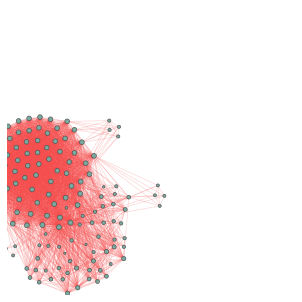

In [23]:
from netwulf import visualize
visualize(london_proj2018)

In [24]:
london_proj2018

({'xlim': [0, 623],
  'ylim': [0, 623],
  'linkColor': '#c77474',
  'linkAlpha': 0.1821967230902778,
  'nodeStrokeColor': '#555555',
  'nodeStrokeWidth': 1.5349989149305556,
  'links': [{'source': 'P160',
    'target': 'P1638987',
    'width': 2.8227528074854686,
    'weight': 1},
   {'source': 'P160',
    'target': 'P3059808',
    'width': 2.8227528074854686,
    'weight': 1},
   {'source': 'P160',
    'target': 'P1281677',
    'width': 2.8227528074854686,
    'weight': 1},
   {'source': 'P160',
    'target': 'P1680500',
    'width': 2.8227528074854686,
    'weight': 1},
   {'source': 'P160',
    'target': 'P396990',
    'width': 2.8227528074854686,
    'weight': 1},
   {'source': 'P160',
    'target': 'P1369015',
    'width': 2.8227528074854686,
    'weight': 1},
   {'source': 'P160',
    'target': 'P2063214',
    'width': 2.8227528074854686,
    'weight': 1},
   {'source': 'P160',
    'target': 'P2067975',
    'width': 2.8227528074854686,
    'weight': 1},
   {'source': 'P160',
    

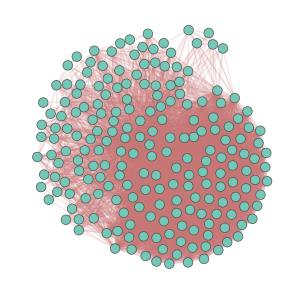

In [27]:
visualize(london_proj2019)

({'xlim': [0, 623],
  'ylim': [0, 623],
  'linkColor': '#7c7c7c',
  'linkAlpha': 0.5,
  'nodeStrokeColor': '#555555',
  'nodeStrokeWidth': 0.8683322482638889,
  'links': [{'source': 'P28',
    'target': 'P894051',
    'width': 1.7366644965277778,
    'weight': 1},
   {'source': 'P28',
    'target': 'P1488476',
    'width': 1.7366644965277778,
    'weight': 1},
   {'source': 'P28',
    'target': 'P1002688',
    'width': 1.7366644965277778,
    'weight': 1},
   {'source': 'P28',
    'target': 'P1677058',
    'width': 1.7366644965277778,
    'weight': 1},
   {'source': 'P28',
    'target': 'P677256',
    'width': 1.7366644965277778,
    'weight': 1},
   {'source': 'P28',
    'target': 'P1653354',
    'width': 1.7366644965277778,
    'weight': 1},
   {'source': 'P28',
    'target': 'P147030',
    'width': 1.7366644965277778,
    'weight': 1},
   {'source': 'P28',
    'target': 'P1543321',
    'width': 1.7366644965277778,
    'weight': 1},
   {'source': 'P28',
    'target': 'P2175625',
    

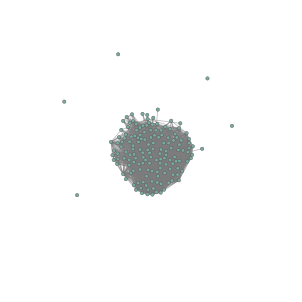

In [28]:
visualize(london_proj2020)

({'xlim': [0, 623],
  'ylim': [0, 623],
  'linkColor': '#5d76a4',
  'linkAlpha': 0.5,
  'nodeStrokeColor': '#555555',
  'nodeStrokeWidth': 0.8683322482638889,
  'links': [{'source': 'P1',
    'target': 'P740345',
    'width': 1.7366644965277778,
    'weight': 1},
   {'source': 'P1',
    'target': 'P819',
    'width': 1.7366644965277778,
    'weight': 1},
   {'source': 'P1',
    'target': 'P209572',
    'width': 1.7366644965277778,
    'weight': 1},
   {'source': 'P1',
    'target': 'P317487',
    'width': 1.7366644965277778,
    'weight': 1},
   {'source': 'P1',
    'target': 'P222263',
    'width': 1.7366644965277778,
    'weight': 1},
   {'source': 'P1',
    'target': 'P34476',
    'width': 1.7366644965277778,
    'weight': 1},
   {'source': 'P1',
    'target': 'P879015',
    'width': 1.7366644965277778,
    'weight': 1},
   {'source': 'P1',
    'target': 'P937036',
    'width': 1.7366644965277778,
    'weight': 1},
   {'source': 'P1',
    'target': 'P59227',
    'width': 1.736664496

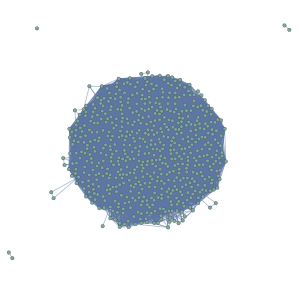

In [29]:
visualize(sf_proj2018)

({'xlim': [0, 623],
  'ylim': [0, 623],
  'linkColor': '#4f6d8a',
  'linkAlpha': 0.5,
  'nodeStrokeColor': '#555555',
  'nodeStrokeWidth': 0.5088359177714646,
  'links': [{'source': 'P1', 'target': 'P425', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P819', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P738432', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P209572', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P1154385', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P17092', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P317487', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P1309897', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P8778', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P12809', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P1427418', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P476404', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P655

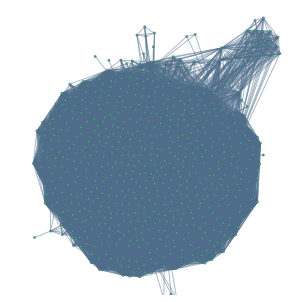

In [30]:
visualize(sf_proj2019)

({'xlim': [0, 623],
  'ylim': [0, 623],
  'linkColor': '#7a97c0',
  'linkAlpha': 0.5,
  'nodeStrokeColor': '#555555',
  'nodeStrokeWidth': 1.6199470288825757,
  'links': [{'source': 'P1', 'target': 'P819', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P209572', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P1529544', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P1461297', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P1208365', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P34476', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P937036', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P1309897', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P59227', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P8778', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P2637329', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': 'P81635', 'width': 2, 'weight': 1},
   {'source': 'P1', 'target': '

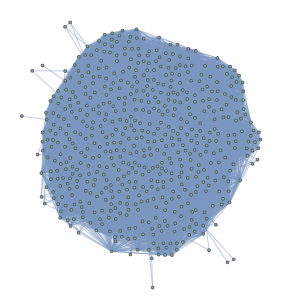

In [31]:
visualize(sf_proj2020)

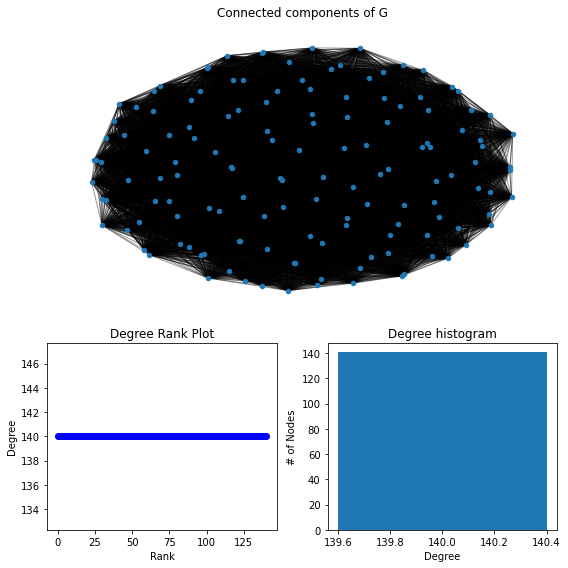

In [39]:
G = nx.gnp_random_graph(141, 3655, seed=10374196)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


In [ ]:
206, number of edges: 7308

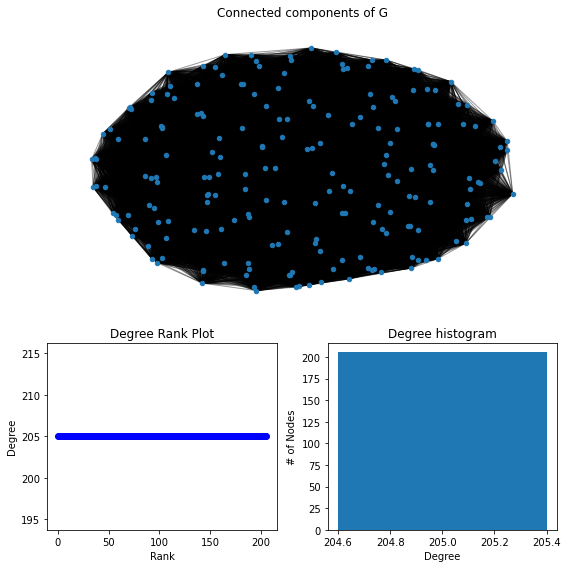

In [37]:
G = nx.gnp_random_graph(206, 7308.0)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


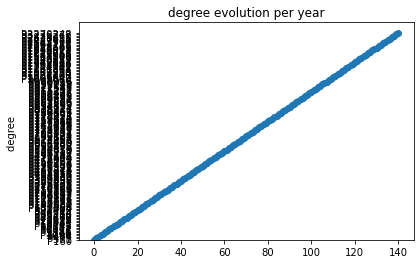

In [13]:
plt.plot(london_proj2018, '-o')
plt.ylabel("degree ")
plt.title("degree evolution per year")
plt.ylim(ymin=0)
plt.show()

In [15]:
for (index, (service_name, graph)) in enumerate(g_london_2018, london_proj2018):
    axes[index].hist(degree_list(london_proj2018), bins=25)
    axes[index].set_title(service_name)
    axes[index].set_xlabel('Degree')
    if index == 0:
        axes[index].set_ylabel('Frequency of Degree')


TypeError: 'Graph' object cannot be interpreted as an integer

In [ ]:

df.to_csv('../data/outputs/ident_obs_clusters_v2.csv', index=False)